In [1]:
import swisslandstats as sls

Read a land statistics file from the Swiss Federal Statistical Office (SFSO) e.g., the [Standard nomenclature](https://www.bfs.admin.ch/bfs/fr/home/services/geostat/geodonnees-statistique-federale/sol-utilisation-couverture/statistique-suisse-superficie/nomenclature-standard.html) `NOAS04`

In [2]:
ldf = sls.read_csv('data/lulc/AREA_NOAS04_72_171129.csv')

In [3]:
# Transform the 4-category land statistics of 2009 `AS09_4` to a numpy array

ldf.to_ndarray('AS09R_4')

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 3, 2],
       [0, 0, 0, ..., 2, 1, 1],
       ...,
       [3, 3, 2, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 2, 2, ..., 0, 0, 0]], dtype=uint8)

In [4]:
# Export the same column to a GeoTIFF

ldf.to_geotiff('landstats.tiff', 'AS09R_4')

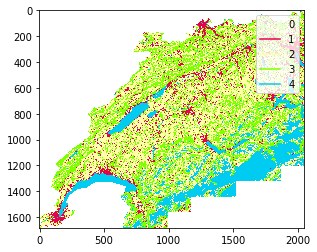

In [5]:
# Or plot it

ldf.plot('AS09R_4', cmap=sls.noas04_4_cmap, legend=True)

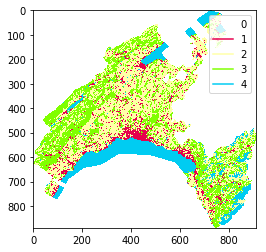

In [6]:
# Clip the dataframe by a place query to OSM's Nominatim

vaud_ldf = sls.clip_by_nominatim(ldf, 'Vaud, Switzerland')
vaud_ldf.plot('AS09R_4', cmap=sls.noas04_4_cmap, legend=True)

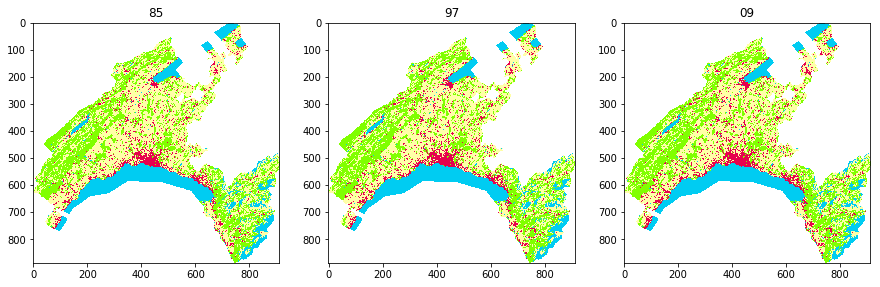

In [6]:
import matplotlib.pyplot as plt

year_columns = ['85', '97', '09']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for year_column, ax in zip(year_columns, axes):
    ax = vaud_ldf.plot('AS%sR_4' % year_column, cmap=sls.noas04_4_cmap, ax=ax)
    ax.set_title(year_column)